In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRanker
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import GridSearchCV

In [3]:
train_data = pd.read_parquet('/Users/parikshitnarang/Desktop/train_data', engine='pyarrow')

In [4]:
train_data.columns

Index(['objective', 'hotelid', 'requestid', 'userId', 'displayCategory',
       'searchdate', 'placeid', 'fprice', 'inserted_at', 'realisedBooking',
       'bookingFlag', 'detailsFlag', 'hotelType', 'rank', 'rating', 'rcount',
       'user_abp', 'isCitySearch', 'place_popularity_score', 'discount_per',
       'hotel_btod', 'hotel_user_br', 'hotel_user_ctr', 'hotel_user_btod',
       'avg_hotel_rr', 'avg_hotel_br', 'avg_hotel_ctr', 'avg_hotel_btod',
       'avg_user_rr', 'stayLength', 'is_weekend_checkin',
       'day_of_week_checkin', 'abp_price_diff', 'recom_score',
       'is_weekend_searchDate', 'day_of_week_searchDate', 'advPurchaseWindow',
       'is_nearBy_search', 'is_city_search', 'vicinity', 'ratingMean',
       'ratingCount', 'hotel_ctr', 'hotel_br', 'hotel_dtob',
       'hotel_placeid_ctr', 'hotel_placeid_br', 'hotel_placeid_dtob',
       'user_cat_ctr', 'user_cat_br', 'user_cat_dtob', 'is_locality_search',
       'distance', 'csv_weight'],
      dtype='object')

In [5]:
train_data = train_data.sort_values(['requestid'], ascending=True)
train_data

,objective,hotelid,requestid,userId,displayCategory,searchdate,placeid,fprice,inserted_at,realisedBooking,...,hotel_dtob,hotel_placeid_ctr,hotel_placeid_br,hotel_placeid_dtob,user_cat_ctr,user_cat_br,user_cat_dtob,is_locality_search,distance,csv_weight
172626,0,35548,0000ac31-7b46-4e7c-9048-b5e8346db533,63615692,OYO Rooms,2020-02-06,None,932.0,2020020604,0,...,0.09373964453733148,0.07100957544560928,0.008520069377900544,0.09373964453733148,0.031829357960081406,0.0,0.0,0,2.224223,1.000000
526151,1,79122,0000ac31-7b46-4e7c-9048-b5e8346db533,63615692,OYO Rooms,2020-02-06,None,986.0,2020020604,0,...,0.04423233507333381,0.06290387766702077,0.003570630356869907,0.04423233507333381,0.031829357960081406,0.0,0.0,0,4.870435,8.025555
312341,0,39915,0000b84c-70f8-4362-b577-6a71b5092a4a,87138520,OYO Rooms,2020-02-27,None,599.0,2020022719,0,...,0.016091836734693873,0.04947833485383932,7.946586041824137E-4,0.016091836734693873,0.0,0.0,0.0,0,6.121015,1.000000
312350,0,9090,0000b84c-70f8-4362-b577-6a71b5092a4a,87138520,OYO Rooms,2020-02-27,None,599.0,2020022719,0,...,0.07115281269960579,0.10349717949389217,0.008925462958016155,0.07115281269960579,0.0,0.0,0.0,0,4.048366,1.000000
312351,0,77958,0000b84c-70f8-4362-b577-6a71b5092a4a,87138520,OYO Rooms,2020-02-27,None,599.0,2020022719,0,...,0.04303023589819171,0.10225479577097608,0.005006742670460616,0.04303023589819171,0.0,0.0,0.0,0,1.651101,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396700,0,3414,fffe6bc5-bbe3-4224-8551-f2b258993952,5052769,OYO Rooms,2020-02-18,None,599.0,2020021817,0,...,0.09647896431562605,0.09962320559912571,0.010472130584320703,0.09647896431562605,0.045470511371544856,0.0,0.0,0,2.058897,1.000000
396699,0,18326,fffe6bc5-bbe3-4224-8551-f2b258993952,5052769,SPOT ON,2020-02-18,None,599.0,2020021817,0,...,0.04597035840222322,0.0910236521669216,0.0046998755342898876,0.04597035840222322,0.0,0.0,0.0,0,1.622747,1.000000
555498,1,78173,fffe6bc5-bbe3-4224-8551-f2b258993952,5052769,OYO Rooms,2020-02-18,None,599.0,2020021817,0,...,0.023626456982101994,0.0664044058686362,0.002029277879678506,0.023626456982101994,0.045470511371544856,0.0,0.0,0,4.523421,8.025555
555499,1,77963,fffe6bc5-bbe3-4224-8551-f2b258993952,5052769,OYO Rooms,2020-02-18,None,599.0,2020021817,0,...,0.031623063639138665,0.14459335133099963,0.004515089483221,0.031623063639138665,0.045470511371544856,0.0,0.0,0,4.740996,8.025555


In [6]:
train_data.reset_index(drop=True, inplace=True)
train_data

,objective,hotelid,requestid,userId,displayCategory,searchdate,placeid,fprice,inserted_at,realisedBooking,...,hotel_dtob,hotel_placeid_ctr,hotel_placeid_br,hotel_placeid_dtob,user_cat_ctr,user_cat_br,user_cat_dtob,is_locality_search,distance,csv_weight
0,0,35548,0000ac31-7b46-4e7c-9048-b5e8346db533,63615692,OYO Rooms,2020-02-06,None,932.0,2020020604,0,...,0.09373964453733148,0.07100957544560928,0.008520069377900544,0.09373964453733148,0.031829357960081406,0.0,0.0,0,2.224223,1.000000
1,1,79122,0000ac31-7b46-4e7c-9048-b5e8346db533,63615692,OYO Rooms,2020-02-06,None,986.0,2020020604,0,...,0.04423233507333381,0.06290387766702077,0.003570630356869907,0.04423233507333381,0.031829357960081406,0.0,0.0,0,4.870435,8.025555
2,0,39915,0000b84c-70f8-4362-b577-6a71b5092a4a,87138520,OYO Rooms,2020-02-27,None,599.0,2020022719,0,...,0.016091836734693873,0.04947833485383932,7.946586041824137E-4,0.016091836734693873,0.0,0.0,0.0,0,6.121015,1.000000
3,0,9090,0000b84c-70f8-4362-b577-6a71b5092a4a,87138520,OYO Rooms,2020-02-27,None,599.0,2020022719,0,...,0.07115281269960579,0.10349717949389217,0.008925462958016155,0.07115281269960579,0.0,0.0,0.0,0,4.048366,1.000000
4,0,77958,0000b84c-70f8-4362-b577-6a71b5092a4a,87138520,OYO Rooms,2020-02-27,None,599.0,2020022719,0,...,0.04303023589819171,0.10225479577097608,0.005006742670460616,0.04303023589819171,0.0,0.0,0.0,0,1.651101,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569540,0,3414,fffe6bc5-bbe3-4224-8551-f2b258993952,5052769,OYO Rooms,2020-02-18,None,599.0,2020021817,0,...,0.09647896431562605,0.09962320559912571,0.010472130584320703,0.09647896431562605,0.045470511371544856,0.0,0.0,0,2.058897,1.000000
569541,0,18326,fffe6bc5-bbe3-4224-8551-f2b258993952,5052769,SPOT ON,2020-02-18,None,599.0,2020021817,0,...,0.04597035840222322,0.0910236521669216,0.0046998755342898876,0.04597035840222322,0.0,0.0,0.0,0,1.622747,1.000000
569542,1,78173,fffe6bc5-bbe3-4224-8551-f2b258993952,5052769,OYO Rooms,2020-02-18,None,599.0,2020021817,0,...,0.023626456982101994,0.0664044058686362,0.002029277879678506,0.023626456982101994,0.045470511371544856,0.0,0.0,0,4.523421,8.025555
569543,1,77963,fffe6bc5-bbe3-4224-8551-f2b258993952,5052769,OYO Rooms,2020-02-18,None,599.0,2020021817,0,...,0.031623063639138665,0.14459335133099963,0.004515089483221,0.031623063639138665,0.045470511371544856,0.0,0.0,0,4.740996,8.025555


In [7]:
counts = train_data['requestid'].value_counts().to_dict()
counts

{'7fee9f56-3cac-4eb7-8db9-209e9df4a9fa': 180,
 'd0181e8d-ade9-4b23-8837-67b8da091b1c': 176,
 '37d93129-7f56-4aa3-8f22-54e38776326f': 175,
 '009a9a5b-100c-4dac-822b-370c43dccccf': 167,
 '6a56e136-8518-4984-9f50-f050e2b0b6cf': 160,
 'c863fcfc-f3e5-4356-ae57-a2fb6be71e6d': 159,
 'f7e1e433-9591-4191-b933-f6d6920c98e2': 155,
 '5289924e-0270-4f17-a892-c3877da34bb8': 153,
 '60fcd280-8618-4ee6-bb0a-25f813956606': 152,
 'f30d755b-bce6-4869-9824-61246dd23169': 151,
 '27bf3fcf-da82-4a6e-9fb0-b5700e8cd411': 150,
 'e5b148b2-5701-4d07-b58f-3f5c310fc37a': 150,
 '8174b2ca-d956-4024-9ee7-e5d32d622ad8': 150,
 '92358be9-1f6c-4a57-841d-b35fb256a8ec': 149,
 '01bfbb87-816d-42b4-accf-e53373b82705': 148,
 '0747a2e9-48f4-4d47-aa30-6f034c48ae67': 148,
 'c748e76b-45e4-4606-a737-1a79e84b4464': 148,
 '84a795ae-a696-4073-909a-82f23ce53ab1': 147,
 'a443a71c-069c-4e08-ac2a-118154b57e85': 146,
 '5383c589-00b2-4680-9ce3-e45543617009': 143,
 '79d6c4cc-533f-43d0-81c6-a0070542d5ba': 142,
 '738cc1dc-fcb3-4b89-85f5-e367d346

In [8]:
count_list = []
for ind_counts in sorted(counts):
    count_list.append(counts[ind_counts])
count_list    

[2,
 51,
 2,
 60,
 2,
 8,
 5,
 4,
 60,
 60,
 3,
 8,
 12,
 60,
 40,
 19,
 12,
 11,
 33,
 15,
 10,
 10,
 6,
 3,
 14,
 8,
 60,
 2,
 5,
 2,
 17,
 2,
 65,
 16,
 11,
 50,
 11,
 4,
 10,
 3,
 11,
 10,
 10,
 8,
 5,
 9,
 10,
 52,
 7,
 20,
 5,
 7,
 6,
 10,
 2,
 25,
 3,
 5,
 3,
 3,
 60,
 13,
 60,
 2,
 1,
 4,
 6,
 8,
 2,
 2,
 31,
 9,
 12,
 2,
 12,
 30,
 100,
 10,
 6,
 113,
 20,
 9,
 14,
 8,
 2,
 44,
 10,
 21,
 10,
 2,
 20,
 13,
 2,
 9,
 3,
 10,
 21,
 10,
 11,
 22,
 2,
 18,
 2,
 7,
 167,
 10,
 6,
 40,
 3,
 17,
 29,
 17,
 15,
 2,
 2,
 10,
 18,
 2,
 10,
 4,
 18,
 45,
 20,
 3,
 10,
 7,
 35,
 8,
 33,
 2,
 2,
 4,
 19,
 6,
 2,
 46,
 9,
 7,
 2,
 9,
 20,
 3,
 2,
 8,
 8,
 2,
 1,
 5,
 9,
 6,
 4,
 2,
 3,
 1,
 2,
 37,
 3,
 6,
 2,
 1,
 2,
 5,
 8,
 26,
 6,
 7,
 50,
 1,
 5,
 2,
 31,
 8,
 4,
 30,
 3,
 10,
 14,
 10,
 10,
 8,
 10,
 8,
 3,
 30,
 33,
 17,
 2,
 10,
 3,
 8,
 5,
 17,
 16,
 2,
 2,
 8,
 8,
 21,
 2,
 4,
 2,
 2,
 10,
 2,
 14,
 25,
 3,
 2,
 6,
 3,
 2,
 9,
 15,
 9,
 17,
 59,
 1,
 1,
 6,
 3,
 4,
 10,
 11,
 2,
 28,
 11,
 13,
 17,
 15,
 13,
 18,
 8,
 3,
 80,
 2,
 6,
 10,
 5,
 8,
 9,
 2,
 3,
 2,
 7,
 5,
 2,
 8,
 44,
 4,
 9,
 3,
 7,
 10,
 4,
 2,
 3,
 5,
 14,
 3,
 3,
 44,
 2,
 6,
 13,
 26,
 20,
 4,
 1,
 1,
 1,
 2,
 30,
 2,
 17,
 3,
 10,
 2,
 10,
 10,
 3,
 4,
 8,
 30,
 17,
 8,
 13,
 11,
 3,
 40,
 13,
 30,
 20,
 3,
 8,
 5,
 8,
 4,
 57,
 7,
 15,
 9,
 3,
 148,
 9,
 11,
 30,
 2,
 4,
 7,
 10,
 2,
 8,
 14,
 3,
 5,
 2,
 20,
 6,
 9,
 4,
 6,
 4,
 8,
 35,
 2,
 25,
 4,
 20,
 7,
 21,
 2,
 3,
 20,
 2,
 5,
 2,
 40,
 41,
 40,
 17,
 21,
 28,
 5,
 6,
 14,
 4,
 9,
 43,
 5,
 7,
 8,
 13,
 14,
 1,
 11,
 10,
 8,
 3,
 4,
 3,
 30,
 8,
 2,
 6,
 3,
 2,
 4,
 60,
 4,
 14,
 1,
 6,
 25,
 5,
 6,
 8,
 2,
 9,
 2,
 14,
 2,
 3,
 9,
 10,
 84,
 10,
 3,
 20,
 20,
 17,
 8,
 3,
 10,
 3,
 8,
 9,
 4,
 2,
 6,
 30,
 18,
 10,
 4,
 4,
 27,
 2,
 4,
 2,
 7,
 60,
 2,
 2,
 5,
 2,
 20,
 7,
 2,
 11,
 4,
 23,
 10,
 6,
 7,
 29,
 50,
 27,
 2,
 2,
 4,
 14,
 11,
 8,
 24,
 2,
 26,
 48,
 2,
 9,
 3,
 18,
 60,
 14,
 7,
 23,
 2,
 5,
 4,
 15,
 4,
 4,
 15,
 9,
 10,
 6,
 2,
 13,
 10,
 5,
 5,
 7,
 2,
 5,
 5,
 60,
 2,
 77,
 38,
 4,
 16,
 2,
 5,
 1,
 2,
 2,
 2,
 6,
 7,
 35,
 40,
 34,
 2,
 8,
 31,
 6,
 7,
 3,
 6,
 1,
 1,
 3,
 2,
 2,
 10,
 14,
 2,
 8,
 8,
 7,
 27,
 8,
 1,
 9,
 8,
 8,
 16,
 10,
 1,
 15,
 3,
 1,
 5,
 6,
 6,
 4,
 3,
 2,
 6,
 2,
 2,
 21,
 10,
 2,
 10,
 4,
 3,
 10,
 3,
 2,
 17,
 10,
 5,
 2,
 5,
 3,
 12,
 20,
 26,
 17,
 4,
 18,
 10,
 5,
 80,
 5,
 14,
 47,
 31,
 10,
 35,
 7,
 2,
 10,
 6,
 5,
 10,
 3,
 6,
 10,
 3,
 4,
 47,
 14,
 2,
 2,
 11,
 6,
 60,
 23,
 2,
 2,
 2,
 16,
 9,
 9,
 11,
 7,
 13,
 24,
 1,
 10,
 80,
 53,
 2,
 7,
 9,
 11,
 2,
 4,
 3,
 6,
 2,
 78,
 6,
 2,
 3,
 8,
 60,
 3,
 20,
 10,
 6,
 37,
 11,
 6,
 10,
 3,
 8,
 7,
 3,
 10,
 6,
 60,
 5,
 7,
 48,
 17,
 3,
 10,
 7,
 23,
 8,
 15,
 6,
 2,
 10,
 17,
 2,
 10,
 16,
 2,
 3,
 3,
 4,
 26,
 8,
 12,
 46,
 15,
 50,
 6,
 5,
 26,
 22,
 7,
 38,
 20,
 10,
 4,
 1,
 1,
 2,
 2,
 41,
 5,
 20,
 10,
 10,
 15,
 2,
 17,
 8,
 11,
 2,
 3,
 10,
 8,
 11,
 2,
 3,
 86,
 13,
 31,
 20,
 2,
 3,
 60,
 30,
 7,
 4,
 1,
 3,
 33,
 10,
 7,
 8,
 2,
 3,
 8,
 8,
 2,
 2,
 2,
 26,
 2,
 5,
 2,
 9,
 22,
 22,
 2,
 3,
 21,
 5,
 12,
 2,
 10,
 20,
 22,
 5,
 6,
 1,
 10,
 17,
 2,
 10,
 30,
 10,
 9,
 3,
 1,
 30,
 4,
 2,
 60,
 10,
 85,
 2,
 15,
 3,
 6,
 2,
 9,
 10,
 1,
 24,
 10,
 5,
 2,
 8,
 7,
 1,
 2,
 30,
 11,
 5,
 16,
 4,
 2,
 3,
 10,
 13,
 2,
 8,
 8,
 8,
 3,
 10,
 9,
 10,
 2,
 10,
 1,
 8,
 21,
 6,
 36,
 12,
 11,
 8,
 9,
 10,
 1,
 21,
 20,
 6,
 10,
 7,
 3,
 2,
 23,
 4,
 10,
 12,
 5,
 16,
 3,
 34,
 9,
 8,
 7,
 2,
 2,
 1,
 17,
 3,
 10,
 24,
 4,
 3,
 27,
 1,
 6,
 1,
 7,
 4,
 12,
 60,
 7,
 35,
 5,
 2,
 4,
 7,
 16,
 19,
 2,
 5,
 2,
 10,
 7,
 101,
 3,
 33,
 6,
 16,
 6,
 11,
 18,
 3,
 3,
 3,
 1,
 2,
 8,
 14,
 16,
 5,
 7,
 2,
 16,
 20,
 2,
 8,
 3,
 21,
 2,
 10,
 14,
 4,
 4,
 22,
 7,
 11,
 10,
 38,
 4,
 20,
 10,
 9,
 10,
 4,
 31,
 3,
 5,
 3,
 14,
 6,
 58,
 4,
 9,
 5,
 12,
 2,
 7,
 41,
 16,
 20,
 20,
 20,
 7,
 10,
 15,
 15,
 47,
 3,
 17,
 1,
 3,
 43,
 5,
 8,
 6,
 24,
 7,
 3,
 2,
 5,
 20,
 2,
 2,
 30,
 8,
 4,
 43,
 2,
 

In [9]:
features_x = ['hotelType', 'hotel_user_br', 'hotel_user_ctr', 'hotel_user_btod','distance', 'fprice', 'discount_per',
       'ratingCount','user_abp', 'avg_hotel_rr',
       'hotel_placeid_ctr', 'hotel_placeid_br',
      'user_cat_ctr', 'user_cat_br', 'user_cat_dtob', 'recom_score', 'is_city_search', 'hotel_placeid_dtob']

# features_x = ['fprice', 'distance', 'recom_score', 'ratingCount', 
#             'discount_per', 'hotelType', 'hotel_user_btod', 'hotel_user_ctr', 
#             'hotel_user_br', 'user_abp', 'user_cat_ctr', 'user_cat_br', 'user_cat_dtob', 
#             'avg_hotel_rr', 'hotel_placeid_ctr', 'hotel_placeid_br', 'hotel_placeid_dtob', 'isCitySearch',
#             'is_weekend_checkin']
# features_x = ['fprice', 'user_abp',
#             'discount_per',
#             'hotel_btod',
#             'hotel_user_ctr',
#             'avg_hotel_rr',
#             'avg_hotel_br',
#             'avg_hotel_ctr',
#             'abp_price_diff',
#             'recom_score',
#             'ratingCount',
#             'hotel_ctr',
#             'hotel_placeid_ctr',
#             'hotel_placeid_br',
#             'hotel_placeid_dtob',
#             'user_cat_ctr',
#             'user_cat_br',
#             'distance',
#              'hotelType'
#              ]
features_y = ['objective']

In [10]:
len(features_x)

18

In [14]:
x_train.is_city_search.unique()

array([1, 0])

In [12]:
x_train = train_data[features_x]
y_train = train_data[features_y]

In [10]:
# clf=LGBMRanker(class_weight='balanced', objective='lambdarank',random_state=42,n_jobs=1, verbosity=3)
clf=LGBMRanker(class_weight='balanced', objective='lambdarank', colsample_bytree=0.1,min_child_weight=0.01, max_depth=10,random_state=0,n_jobs=20)
# grid = {'learning_rate':[1e-1, 1e-2, 1e-3, 1e-4], 'max_depth':[5, 6, 7, 8], 'num_leaves':[32, 64, 128, 256]}
# abc = GridSearchCV(clf, grid, scoring='ndcg_score')
# abc.fit(x_train, y_train)

In [11]:
clf.fit(x_train.values, y_train.values.ravel(), group=count_list)

# import xgboost as xgb
# params = {'objective': 'rank:pairwise', 'learning_rate': 0.1,
#           'gamma': 1.0, 'min_child_weight': 0.1,
#           'max_depth': 6, 'n_estimators': 20}
# clf = xgb.sklearn.XGBRanker(**params)
# clf.fit(np.array(x_train), np.array(y_train).ravel(), group=count_list)

LGBMRanker(boosting_type='gbdt', class_weight='balanced', colsample_bytree=0.1,
           importance_type='split', learning_rate=0.1, max_depth=10,
           min_child_samples=20, min_child_weight=0.01, min_split_gain=0.0,
           n_estimators=100, n_jobs=20, num_leaves=31, objective='lambdarank',
           random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
# import lightgbm
# lightgbm.plot_metric(clf)

In [13]:
eval_data = pd.read_parquet('/Users/parikshitnarang/Desktop/eval_data', engine='pyarrow')
eval_data

,objective,hotelid,requestid,userId,displayCategory,searchdate,placeid,fprice,inserted_at,realisedBooking,...,hotel_dtob,hotel_placeid_ctr,hotel_placeid_br,hotel_placeid_dtob,user_cat_ctr,user_cat_br,user_cat_dtob,is_locality_search,distance,csv_weight
0,2,75455,05d726c2-69c6-43a8-b9b4-82b907d958e3,88152550,OYO Rooms,2020-03-05,None,644.0,2020030505,0,...,0.042956290073595485,0.06553182405077605,0.003386648210853346,0.042956290073595485,0.022789328549174703,0.022789328549174703,0.18231462839339763,0,4.978312,327.910959
1,2,89854,9f124636-0053-45bf-81b8-70c58bfe8e67,85766126,OYO Rooms,2020-03-04,None,818.0,2020030410,0,...,0.01775520011849654,0.020586437724939278,0.0011213810601155708,0.01775520011849654,0.0494609146158118,0.007609371479355662,0.032778830987993626,0,3.703528,327.910959
2,2,5617,d7efa2a9-ba61-4a86-bca8-4b380e1d07c6,29299556,OYO Rooms,2020-03-04,None,754.0,2020030403,0,...,0.028293159314420124,0.04487123392550455,0.0017312682622095733,0.028293159314420124,0.03551040023699308,0.03551040023699308,0.2130624014219585,0,0.204926,327.910959
3,2,61140,63e384a6-958e-4a8d-ac3e-978c5e8feacd,17505408,Townhouse,2020-03-10,None,748.0,2020031003,0,...,0.08467149892736729,0.12538523244136948,0.010913113133805085,0.08467149892736729,0.0523487594654293,0.005894325548163222,0.0795733949002035,0,2.621414,327.910959
4,2,91467,03ab7df5-27b8-42e0-a184-46770a43d717,81088218,OYO Rooms,2020-03-02,ChIJhc2TaOeCXjkRxoHDjRwlAtM,702.0,2020030211,0,...,0.027869381031673045,0.41804071547509564,0.41804071547509564,0.41804071547509564,0.0696734525791826,0.0696734525791826,0.41804071547509564,1,0.795600,327.910959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264479,0,79667,fe07284c-6f02-451b-94a6-1956b343374a,12294983,OYO Rooms,2020-03-03,None,1194.0,2020030308,0,...,0.020787003971252084,0.03520966186023552,0.0011244214460892341,0.020787003971252084,0.09173048870831994,0.020260386403395027,0.14395944139520325,0,0.915385,1.000000
264480,0,80001,fe07284c-6f02-451b-94a6-1956b343374a,12294983,OYO Rooms,2020-03-03,None,1133.0,2020030308,0,...,0.03492811635616756,0.03153340763940363,0.001671945818885649,0.03492811635616756,0.09173048870831994,0.020260386403395027,0.14395944139520325,0,2.353868,1.000000
264481,0,16338,fe07284c-6f02-451b-94a6-1956b343374a,12294983,OYO Rooms,2020-03-03,None,942.0,2020030308,0,...,0.056122419950582786,0.059837737928452046,0.005127042626012629,0.056122419950582786,0.09173048870831994,0.020260386403395027,0.14395944139520325,0,2.470843,1.000000
264482,0,18420,fe07284c-6f02-451b-94a6-1956b343374a,12294983,OYO Rooms,2020-03-03,None,702.0,2020030308,0,...,0.04155260029936037,0.03518208772488057,0.0022465912819061083,0.04155260029936037,0.09173048870831994,0.020260386403395027,0.14395944139520325,0,3.324483,1.000000


In [14]:
eval_data = eval_data.sort_values(['requestid'], ascending=True)
eval_data.reset_index(drop=True, inplace=True)
eval_data

,objective,hotelid,requestid,userId,displayCategory,searchdate,placeid,fprice,inserted_at,realisedBooking,...,hotel_dtob,hotel_placeid_ctr,hotel_placeid_br,hotel_placeid_dtob,user_cat_ctr,user_cat_br,user_cat_dtob,is_locality_search,distance,csv_weight
0,0,2572,0003d132-38e5-4bfa-baaa-b6907915094c,70266776,Capital O,2020-03-08,None,1941.0,2020030810,0,...,0.06618294522307563,0.0744879320564661,0.005342891558486599,0.06618294522307563,0.0,0.0,0.0,0,2.320423,1.000000
1,0,75517,0003d132-38e5-4bfa-baaa-b6907915094c,70266776,Collection O,2020-03-08,None,2222.0,2020030810,0,...,0.028525357594397185,0.11257018952026043,0.0033547523923185478,0.028525357594397185,0.022735255685772428,0.0,0.0,0,1.217904,1.000000
2,0,45505,0003d132-38e5-4bfa-baaa-b6907915094c,70266776,Collection O,2020-03-08,None,1542.0,2020030810,0,...,0.042832890349756764,0.05553481390937098,0.002530382042971855,0.042832890349756764,0.022735255685772428,0.0,0.0,0,2.481885,1.000000
3,0,57997,0003d132-38e5-4bfa-baaa-b6907915094c,70266776,Collection O,2020-03-08,None,1437.0,2020030810,0,...,0.04879738513999781,0.07459001251808972,0.003717525461060583,0.04879738513999781,0.022735255685772428,0.0,0.0,0,0.148050,1.000000
4,0,62757,0003d132-38e5-4bfa-baaa-b6907915094c,70266776,OYO Rooms,2020-03-08,None,1203.0,2020030810,0,...,0.03486014046186953,0.06819337981705767,0.0025203012407125232,0.03486014046186953,0.0,0.0,0.0,0,4.474332,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264479,0,95283,fffba9ac-2a40-4852-802b-242d5266b7ce,21247938,OYO Rooms,2020-03-10,None,595.0,2020031012,0,...,0.005240815346413441,0.037773800142288164,2.2914455523560513E-4,0.005240815346413441,0.002306475214498652,0.0,0.0,0,3.803237,1.000000
264480,0,79479,fffba9ac-2a40-4852-802b-242d5266b7ce,21247938,3 by OYO,2020-03-10,None,2584.0,2020031012,0,...,0.03429855590294551,0.06327066064801153,0.0023189494896709044,0.03429855590294551,0.0655968435753545,0.0,0.0,0,1.167352,1.000000
264481,1,39915,fffba9ac-2a40-4852-802b-242d5266b7ce,21247938,OYO Rooms,2020-03-10,None,615.0,2020031012,0,...,0.02051341586076138,0.05463384775144501,0.001445289196367174,0.02051341586076138,0.002306475214498652,0.0,0.0,0,6.121015,10.080645
264482,0,3510,fffba9ac-2a40-4852-802b-242d5266b7ce,21247938,OYO Rooms,2020-03-10,None,782.0,2020031012,0,...,0.06755370710392486,0.01942729812177975,0.0017406189272778402,0.06755370710392486,0.002306475214498652,0.0,0.0,0,3.793800,1.000000


In [15]:
counts = eval_data['requestid'].value_counts().to_dict()
count_list2 = []
for ind_counts in sorted(counts):
    count_list2.append(counts[ind_counts])
count_list2    

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 16,
 10,
 20,
 20,
 30,
 10,
 3,
 10,
 10,
 10,
 10,
 20,
 30,
 10,
 20,
 20,
 10,
 60,
 10,
 10,
 3,
 10,
 10,
 10,
 10,
 10,
 2,
 10,
 10,
 10,
 10,
 1,
 10,
 1,
 10,
 10,
 9,
 10,
 9,
 10,
 20,
 10,
 10,
 10,
 50,
 20,
 40,
 10,
 1,
 10,
 10,
 13,
 20,
 10,
 10,
 10,
 10,
 21,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 12,
 10,
 10,
 10,
 60,
 20,
 40,
 40,
 10,
 10,
 20,
 10,
 10,
 20,
 10,
 10,
 10,
 10,
 20,
 16,
 10,
 20,
 10,
 1,
 3,
 10,
 10,
 10,
 10,
 10,
 9,
 30,
 10,
 9,
 7,
 10,
 10,
 7,
 10,
 10,
 20,
 10,
 10,
 10,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 30,
 20,
 10,
 10,
 20,
 10,
 10,
 10,
 10,
 10,
 20,
 20,
 10,
 10,
 4,
 46,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 30,
 10,
 10,
 10,
 10,
 10,
 10,
 30,
 50,
 9,
 10,
 50,
 7,
 30,
 10,
 10,
 20,
 10,
 10,
 10,
 20,
 10,
 20,
 10,
 40,
 10,
 39,
 10,
 20,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 50,
 10,
 30,
 4,
 60,
 10,
 20,
 10,
 20,
 10,
 8,
 11,
 40,
 10,
 2,
 20,
 10,
 30,
 10,
 10,
 10,
 10,
 30,
 10,
 10,
 10,
 10,
 10,
 10,
 40,
 10,
 40,
 10,
 10,
 10,
 10,
 10,
 6,
 13,
 20,
 10,
 10,
 1,
 10,
 10,
 20,
 10,
 10,
 10,
 10,
 10,
 10,
 7,
 7,
 10,
 10,
 60,
 10,
 16,
 8,
 10,
 11,
 2,
 10,
 10,
 10,
 10,
 20,
 10,
 20,
 8,
 10,
 49,
 10,
 10,
 10,
 10,
 6,
 10,
 40,
 10,
 1,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 30,
 20,
 1,
 10,
 10,
 4,
 8,
 10,
 40,
 8,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 20,
 30,
 10,
 30,
 10,
 10,
 10,
 9,
 20,
 10,
 10,
 10,
 10,
 10,
 10,
 60,
 10,
 10,
 10,
 3,
 20,
 10,
 10,
 10,
 10,
 10,
 20,
 30,
 40,
 10,
 10,
 13,
 10,
 20,
 10,
 10,
 10,
 10,
 10,
 30,
 6,
 30,
 10,
 10,
 10,
 10,
 30,
 20,
 10,
 10,
 10,
 6,
 10,
 10,
 10,
 10,
 3,
 1,
 10,
 1,
 9,
 20,
 10,
 10,
 20,
 10,
 10,
 100,
 10,
 10,
 10,
 10,
 10,
 10,
 30,
 20,
 9,
 10,
 20,
 4,
 10,
 8,
 9,
 10,
 100,
 20,
 28,
 10,
 10,
 30,
 10,
 10,
 4,
 8,
 10,
 20,
 10,
 20,
 10,
 10,
 49,
 6,
 60,
 10,
 10,
 10,
 10,
 9,
 1,
 1,
 10,
 10,
 8,
 20,
 10,
 60,
 10,
 50,
 10,
 9,
 6,
 10,
 10,
 10,
 10,
 1,
 8,
 20,
 10,
 8,
 10,
 10,
 1,
 20,
 40,
 90,
 10,
 20,
 10,
 1,
 10,
 20,
 40,
 20,
 9,
 10,
 10,
 10,
 20,
 3,
 11,
 30,
 40,
 10,
 10,
 20,
 20,
 20,
 40,
 9,
 10,
 8,
 10,
 10,
 10,
 10,
 10,
 10,
 40,
 10,
 10,
 10,
 10,
 60,
 10,
 60,
 60,
 9,
 30,
 40,
 10,
 10,
 10,
 10,
 10,
 1,
 50,
 40,
 10,
 1,
 20,
 20,
 10,
 1,
 30,
 30,
 10,
 40,
 10,
 10,
 10,
 20,
 60,
 20,
 10,
 10,
 40,
 10,
 20,
 40,
 1,
 30,
 20,
 10,
 10,
 10,
 2,
 10,
 10,
 3,
 30,
 5,
 10,
 6,
 30,
 10,
 20,
 10,
 10,
 104,
 10,
 40,
 10,
 20,
 20,
 10,
 20,
 20,
 20,
 40,
 40,
 10,
 16,
 10,
 10,
 10,
 120,
 5,
 50,
 10,
 10,
 10,
 30,
 10,
 10,
 14,
 10,
 20,
 10,
 10,
 10,
 10,
 10,
 30,
 10,
 20,
 10,
 10,
 10,
 10,
 50,
 10,
 10,
 10,
 10,
 10,
 20,
 2,
 10,
 10,
 30,
 10,
 10,
 15,
 1,
 6,
 30,
 4,
 10,
 10,
 10,
 1,
 20,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 20,
 14,
 10,
 1,
 30,
 10,
 20,
 7,
 10,
 13,
 40,
 10,
 6,
 5,
 10,
 9,
 10,
 20,
 10,
 5,
 2,
 20,
 1,
 10,
 10,
 10,
 10,
 6,
 20,
 10,
 10,
 10,
 20,
 10,
 2,
 10,
 4,
 10,
 1,
 40,
 10,
 10,
 50,
 20,
 20,
 10,
 10,
 10,
 10,
 20,
 10,
 10,
 10,
 21,
 70,
 30,
 10,
 20,
 2,
 10,
 46,
 10,
 10,
 1,
 10,
 10,
 10,
 20,
 10,
 10,
 10,
 10,
 5,
 20,
 10,
 3,
 30,
 10,
 10,
 10,
 10,
 20,
 10,
 20,
 10,
 20,
 20,
 10,
 10,
 10,
 10,
 10,
 10,
 20,
 10,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 20,
 10,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 20,
 10,
 20,
 10,
 10,
 10,
 10,
 10,
 6,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 45,
 2,
 3,
 10,
 10,
 1,
 9,
 10,
 10,
 20,
 10,
 10,
 20,
 30,
 60,
 10,
 10,
 20,
 10,
 10,
 10,
 3,
 10,
 10,
 20,
 10,
 10,
 4,
 10,
 20,
 60,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 30,
 10,
 10,
 9,
 40,
 20,
 10,
 10,
 10,
 14,
 40,
 10,
 10,
 10,
 10,
 20,
 10,
 10,
 10,
 10,
 20,
 10,
 10,
 10,
 10,
 20,
 1,
 10,
 10,
 20,
 8,
 30,
 10,
 10,
 10,
 40,
 10,
 20,
 30,
 10,
 10,
 10,
 10,
 10,
 20,
 20,
 10,
 10,
 1

In [16]:
x_test = eval_data[features_x]
y_test = eval_data[features_y]
preds = clf.predict(np.array(x_test))

In [23]:
import pickle
filename = 'ahemdabad.pickle'
pickle.dump(clf, open(filename, 'wb'))

In [17]:
x_train = x_train.apply(pd.to_numeric, errors='coerce') #coercion because every column in dataframe was series object

In [18]:
import shap

# shap.initjs()

# explainer = shap.TreeExplainer(clf, x_train, feature_dependence="independent")
# shap_values = explainer.shap_values(shap.sample(x_test, 100))
# shap.summary_plot(shap_values, shap.sample(x_test, 100), feature_names = features_x)

In [19]:
# preds = clf.predict(np.array(x_train))
# predictions_df = train_data.copy()
# predictions_df['score'] = preds
# predictions_df.sort_values(by=['requestid','score'],ascending=[1,0], inplace=True)
# predictions_df['new_rank']  = predictions_df.groupby(by='requestid')['score'].rank(method='first',ascending=False)

# Verification for Evaluation

In [20]:
predictions_df = eval_data.copy()
predictions_df['score'] = preds
predictions_df.sort_values(by=['requestid','score'],ascending=[1,0], inplace=True)
predictions_df['new_rank']  = predictions_df.groupby(by='requestid')['score'].rank(method='first',ascending=False)

In [21]:
import numpy as np

def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum(np.subtract(np.power(2, r), 1) / np.log2(np.arange(2, r.size + 2)))
    return 0.


def ndcg_at_k(r, k):
    idcg = dcg_at_k(sorted(r, reverse=True), k)
    if not idcg:
        return 0.
    return dcg_at_k(r, k) / idcg

def print_current_and_model_ndcg(preds,validation_data):
    predictions_df = validation_data.copy()
    predictions_df['score'] = preds
    model_ranking = predictions_df.sort_values(by=['requestid','score'],ascending=[1,0])
    current_ranking = predictions_df.sort_values(by=['requestid','rank'],ascending=[1,1])
    print("Current ndcg/request:",calculate_ndcg_per_unique_request(current_ranking))
    print("Model ndcg/request:",calculate_ndcg_per_unique_request(model_ranking))

def calculate_ndcg_per_unique_request(df):
    score_list = df.groupby('requestid')['objective'].apply(list).reset_index(name='list')
    total_ndcg = 0
    for row in score_list.index:
        current_ndcg = ndcg_at_k(score_list['list'][row],10)
        total_ndcg+=current_ndcg
        #print(row, current_ndcg)
    return total_ndcg/len(pd.unique(score_list.requestid))

def get_current_and_model_metric_dfs(preds, validation_data, sortby = 'score'):
    def get_evaluation_metric_df(column):
        result = predictions_df[[column,'detailsFlag','bookingFlag']].groupby(column).agg(clicks = ("detailsFlag",sum), bookings = ("bookingFlag",sum))
        total_bookings = len(predictions_df[predictions_df['bookingFlag'] == 1] )
        total_clicks = len(predictions_df[predictions_df['detailsFlag'] == 1] )
        result['top_br'] = result['bookings']/total_bookings
        result['top_ctr'] = result['clicks']/total_clicks
        result['top_br_cummulative'] = result['top_br'].cumsum()
        result['top_ctr_cummulative'] = result['top_ctr'].cumsum()
        return result
    predictions_df = validation_data.copy()
    predictions_df['score'] = preds
    predictions_df.sort_values(by=['requestid',sortby],ascending=[1,0], inplace=True)
    predictions_df['new_rank']  = predictions_df.groupby(by='requestid')[sortby].rank(method='first',ascending=False)
    return get_evaluation_metric_df('rank'), get_evaluation_metric_df('new_rank')




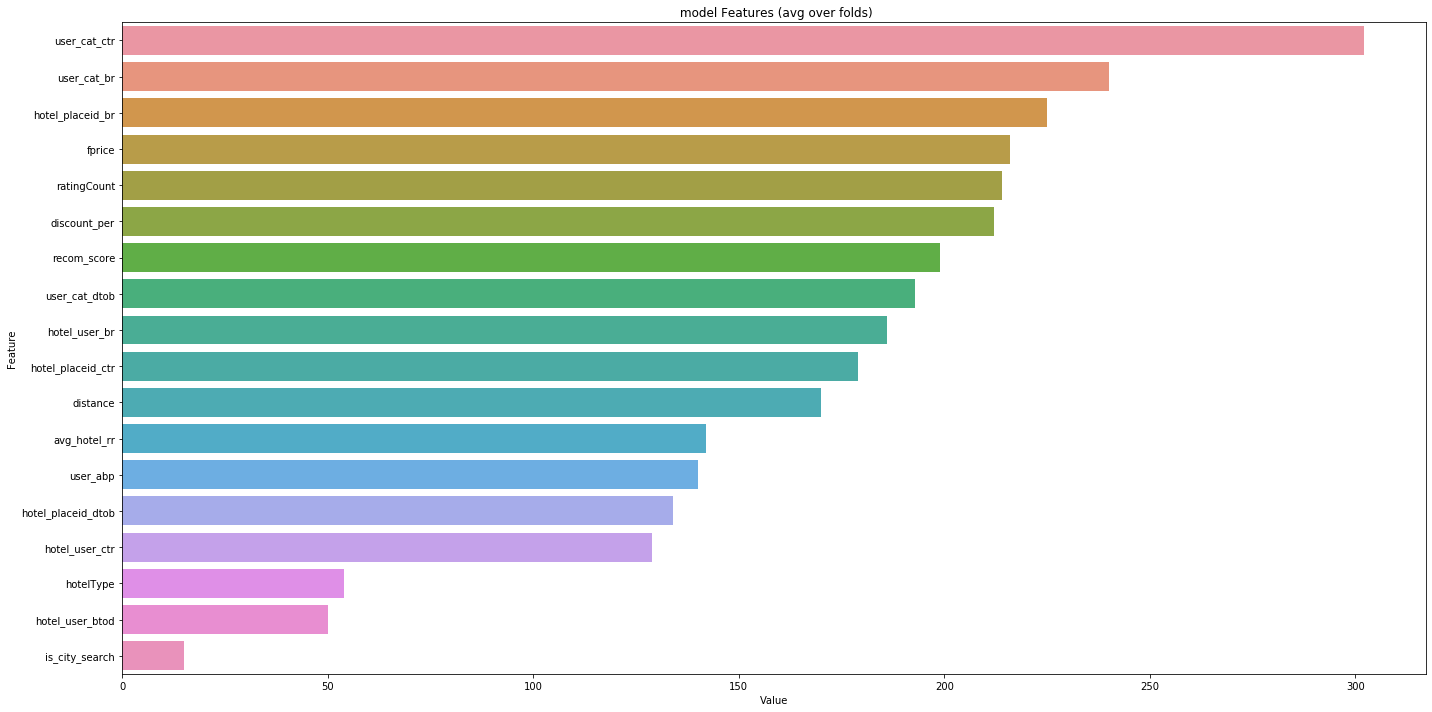

None


In [22]:
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,eval_data[features_x].columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title(' model Features (avg over folds)')
plt.tight_layout()
print(plt.show())

In [23]:
feature_imp['contribution'] = (feature_imp.Value/feature_imp.Value.sum())*100
feature_imp.sort_values(by="Value", ascending=False)

,Value,Feature,contribution
17,302,user_cat_ctr,10.066667
16,240,user_cat_br,8.000000
15,225,hotel_placeid_br,7.500000
14,216,fprice,7.200000
13,214,ratingCount,7.133333
12,212,discount_per,7.066667
11,199,recom_score,6.633333
10,193,user_cat_dtob,6.433333
9,186,hotel_user_br,6.200000
8,179,hotel_placeid_ctr,5.966667


In [24]:
current_metric_df, model_metric_df= get_current_and_model_metric_dfs(preds, eval_data) #change
model_metric_df.head(10)

,clicks,bookings,top_br,top_ctr,top_br_cummulative,top_ctr_cummulative
new_rank,,,,,,
1.0,8767,838,0.614820,0.349575,0.614820,0.349575
2.0,4047,204,0.149670,0.161370,0.764490,0.510945
3.0,2691,90,0.066031,0.107301,0.830521,0.618246
4.0,1949,55,0.040352,0.077714,0.870873,0.695961
5.0,1471,44,0.032282,0.058655,0.903155,0.754615
6.0,1193,28,0.020543,0.047570,0.923698,0.802185
7.0,948,30,0.022010,0.037801,0.945708,0.839986
8.0,772,19,0.013940,0.030783,0.959648,0.870768
9.0,563,9,0.006603,0.022449,0.966251,0.893217


In [25]:
current_metric_df.head(10)

,clicks,bookings,top_br,top_ctr,top_br_cummulative,top_ctr_cummulative
rank,,,,,,
1,7782,477,0.349963,0.310299,0.349963,0.310299
2,3446,181,0.132795,0.137406,0.482759,0.447705
3,2304,127,0.093177,0.091870,0.575935,0.539575
4,1762,103,0.075569,0.070258,0.651504,0.609833
5,1440,87,0.063830,0.057419,0.715334,0.667251
6,1215,66,0.048423,0.048447,0.763756,0.715698
7,995,58,0.042553,0.039675,0.806310,0.755373
8,838,39,0.028613,0.033414,0.834923,0.788787
9,689,31,0.022744,0.027473,0.857667,0.816261


In [26]:
print_current_and_model_ndcg(preds,eval_data)

Current ndcg/request: 0.6421337525105015
Model ndcg/request: 0.7069774795342864


FOR ALL HOTELS:


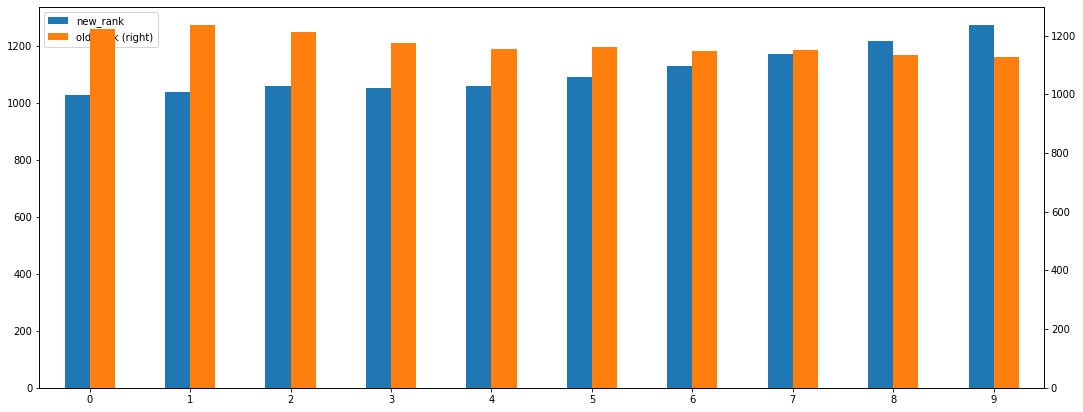

FOR BOOKED HOTELS ONLY:


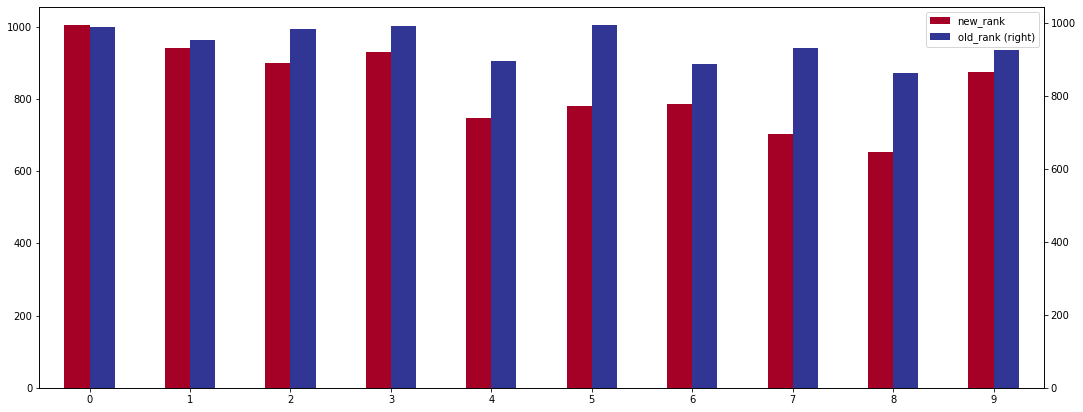

In [27]:
print("FOR ALL HOTELS:")
a = predictions_df.groupby('new_rank')['fprice'].mean().head(10)
b = predictions_df.groupby('rank')['fprice'].mean().head(10)
d = {'new_rank': a.values, 'old_rank': b.values}
x =pd.DataFrame.from_dict(d)

x.plot(kind='bar', secondary_y= 'old_rank', rot= 1,figsize=(18,7))  
plt.show()
print("FOR BOOKED HOTELS ONLY:")
a = predictions_df[predictions_df.bookingFlag == True].groupby('new_rank')['fprice'].mean().head(10)
b = predictions_df[predictions_df.bookingFlag == True].groupby('rank')['fprice'].mean().head(10)
d = {'new_rank': a.values, 'old_rank': b.values}
x =pd.DataFrame.from_dict(d)

x.plot(kind='bar', secondary_y= 'old_rank', rot= 1,figsize=(18,7), colormap = 'RdYlBu')  
plt.show()

FOR ALL HOTELS:


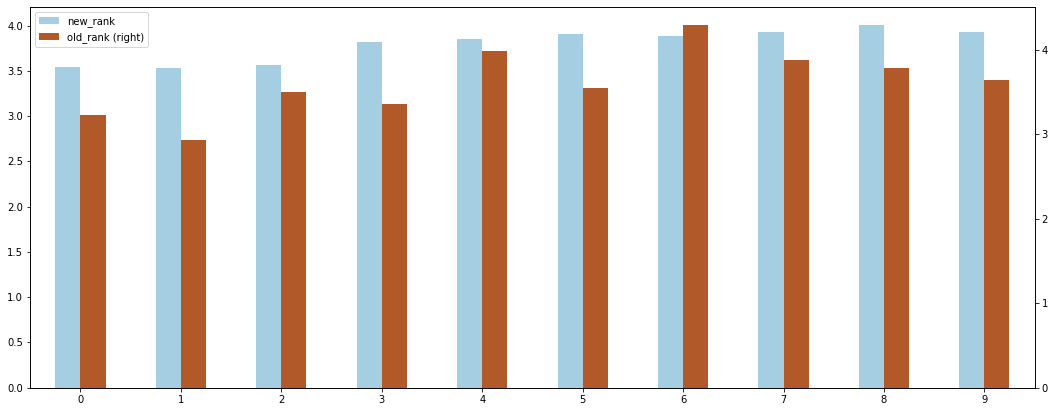

FOR BOOKED HOTELS ONLY:


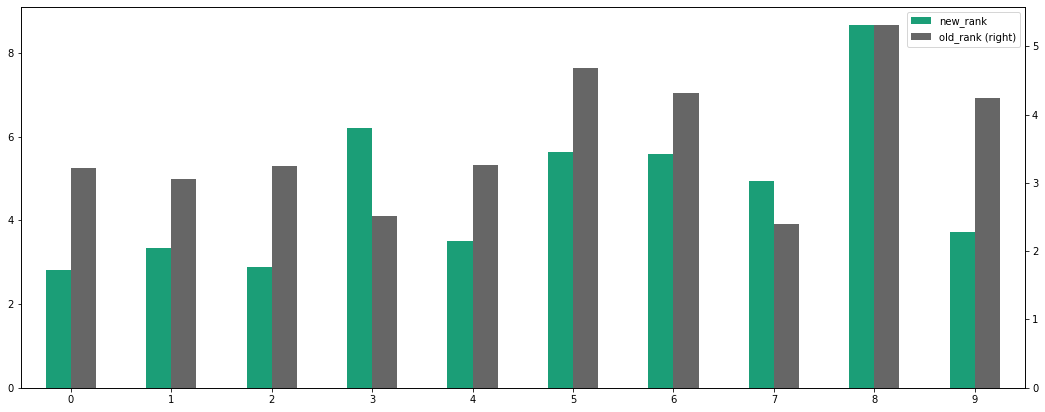

In [28]:
print("FOR ALL HOTELS:")
a = predictions_df.groupby('new_rank')['distance'].mean().head(10)
b = predictions_df.groupby('rank')['distance'].mean().head(10)
d = {'new_rank': a.values, 'old_rank': b.values}
x =pd.DataFrame.from_dict(d)

x.plot(kind='bar', secondary_y= 'old_rank', rot= 1,figsize=(18,7), colormap='Paired')  
plt.show()
print("FOR BOOKED HOTELS ONLY:")
a = predictions_df[predictions_df.bookingFlag == True].groupby('new_rank')['distance'].mean().head(10)
b = predictions_df[predictions_df.bookingFlag == True].groupby('rank')['distance'].mean().head(10)
d = {'new_rank': a.values, 'old_rank': b.values}
x =pd.DataFrame.from_dict(d)

x.plot(kind='bar', secondary_y= 'old_rank', rot= 1,figsize=(18,7), colormap='Dark2')  
plt.show()

In [29]:
predictions_df['hotel_placeid_ctr'] = eval_data['hotel_placeid_ctr'].apply(pd.to_numeric, errors='coerce') #coercion because every column in dataframe was series object

FOR ALL HOTELS:


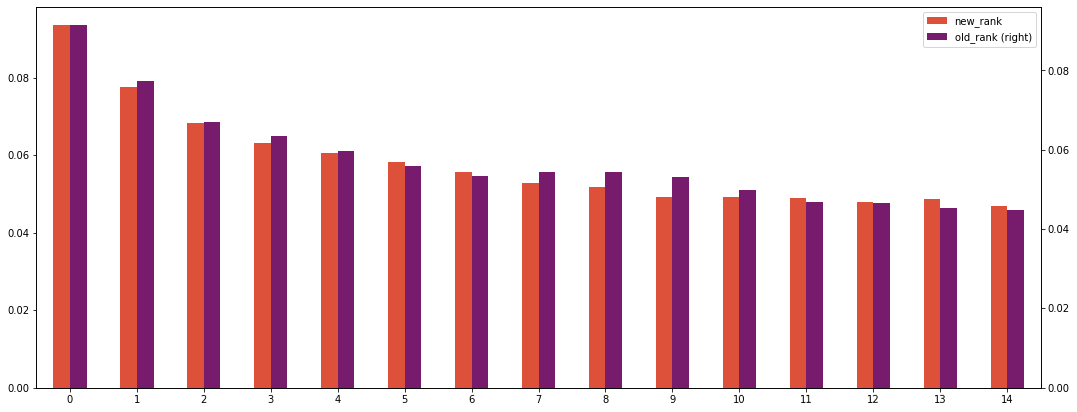

FOR BOOKED HOTELS ONLY:


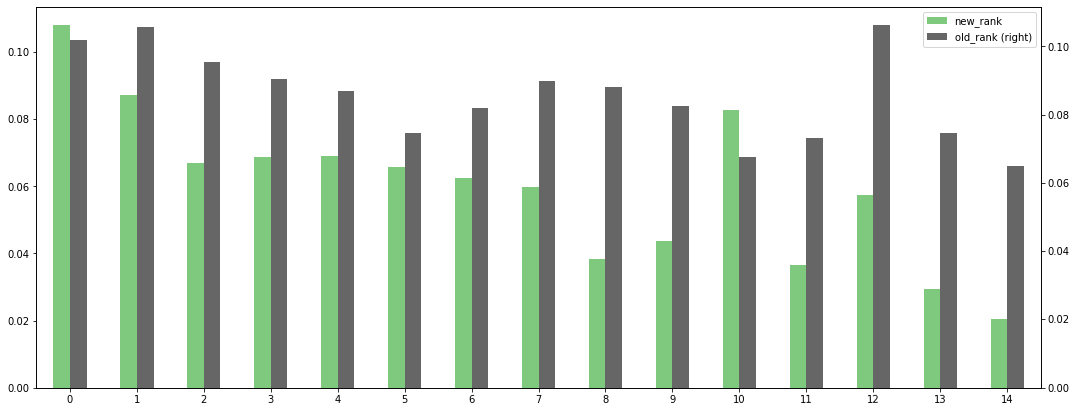

In [30]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4,19, 70))
print("FOR ALL HOTELS:")
a = predictions_df.groupby('new_rank')['hotel_placeid_ctr'].mean().head(15)
b = predictions_df.groupby('rank')['hotel_placeid_ctr'].mean().head(15)
d = {'new_rank': a.values, 'old_rank': b.values}
x =pd.DataFrame.from_dict(d)

x.plot(kind='bar', secondary_y= 'old_rank', rot= 1,figsize=(18,7), color = color)  
plt.show()
print("FOR BOOKED HOTELS ONLY:")
a = predictions_df[predictions_df.bookingFlag == True].groupby('new_rank')['hotel_placeid_ctr'].mean().head(15)
b = predictions_df[predictions_df.bookingFlag == True].groupby('rank')['hotel_placeid_ctr'].mean().head(15)
d = {'new_rank': a.values, 'old_rank': b.values}
x =pd.DataFrame.from_dict(d)

x.plot(kind='bar', secondary_y= 'old_rank', rot= 1,figsize=(18,7), colormap = 'Accent')  
plt.show()

In [31]:
a

new_rank
1.0     0.108080
2.0     0.087225
3.0     0.066884
4.0     0.068624
5.0     0.069026
6.0     0.065656
7.0     0.062567
8.0     0.059933
9.0     0.038363
10.0    0.043615
11.0    0.082835
12.0    0.036476
13.0    0.057535
14.0    0.029506
15.0    0.020566
Name: hotel_placeid_ctr, dtype: float64

In [32]:
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(np.array(eval_data[features_x]))

In [33]:
# shap.summary_plot(shap_values, eval_data[features_x])

In [34]:
# row_no=0
# prediction_row=eval_data[features_x].iloc[row_no]
# print("For Row :"+str(row_no))
# shap_value = explainer.shap_values(np.asarray(prediction_row).reshape(1,-1))
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_value,prediction_row)

In [35]:
# row_no=1
# prediction_row=eval_data[features_x].iloc[row_no]
# print("For Row :"+str(row_no))
# shap_value = explainer.shap_values(np.asarray(prediction_row).reshape(1,-1))
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_value,prediction_row)

In [36]:
# eval_data[features_x] = eval_data[features_x].apply(pd.to_numeric, errors='coerce') #coercion because every column in dataframe was series object

In [37]:
# shap.dependence_plot("user_cat_ctr", shap_values, eval_data[features_x])

In [38]:
# shap.dependence_plot("distance", shap_values, eval_data[features_x])

In [39]:
# shap.dependence_plot("hotel_user_ctr", shap_values, eval_data[features_x])

In [40]:
# shap.dependence_plot("recom_score", shap_values, eval_data[features_x])

In [41]:
# shap.dependence_plot("user_cat_br", shap_values, eval_data[features_x], alpha = 0.1)

# Verification for training

In [42]:
preds = clf.predict(np.array(x_train))
predictions_df = train_data.copy()
predictions_df['score'] = preds
predictions_df.sort_values(by=['requestid','score'],ascending=[1,0], inplace=True)
predictions_df['new_rank']  = predictions_df.groupby(by='requestid')['score'].rank(method='first',ascending=False)

In [43]:
current_metric_df, model_metric_df= get_current_and_model_metric_dfs(preds, train_data) #change
model_metric_df.head(10)

,clicks,bookings,top_br,top_ctr,top_br_cummulative,top_ctr_cummulative
new_rank,,,,,,
1.0,25730,2882,0.770176,0.387611,0.770176,0.387611
2.0,10785,486,0.129877,0.162471,0.900053,0.550082
3.0,6476,158,0.042223,0.097558,0.942277,0.647640
4.0,4405,83,0.022181,0.066359,0.964458,0.713999
5.0,3290,46,0.012293,0.049562,0.976750,0.763562
6.0,2637,36,0.009621,0.039725,0.986371,0.803287
7.0,2043,17,0.004543,0.030777,0.990914,0.834064
8.0,1619,10,0.002672,0.024390,0.993586,0.858453
9.0,1342,8,0.002138,0.020217,0.995724,0.878670


In [44]:
current_metric_df.head(10)

,clicks,bookings,top_br,top_ctr,top_br_cummulative,top_ctr_cummulative
rank,,,,,,
1,18337,1239,0.331106,0.276239,0.331106,0.276239
2,8475,445,0.118920,0.127672,0.450027,0.403911
3,5894,371,0.099145,0.088790,0.549172,0.492701
4,4619,287,0.076697,0.069583,0.625869,0.562284
5,3712,195,0.052111,0.055920,0.677980,0.618204
6,3104,163,0.043560,0.046760,0.721539,0.664964
7,2598,143,0.038215,0.039138,0.759754,0.704102
8,2151,109,0.029129,0.032404,0.788883,0.736506
9,1867,90,0.024051,0.028126,0.812934,0.764631


In [24]:
x_test

,hotelType,hotel_user_br,hotel_user_ctr,hotel_user_btod,distance,fprice,discount_per,ratingCount,user_abp,avg_hotel_rr,hotel_placeid_ctr,hotel_placeid_br,user_cat_ctr,user_cat_br,user_cat_dtob,recom_score,is_city_search,hotel_placeid_dtob
0,17.0,0.0,0.000000,0.0,2.320423,1941.0,0.408412,790.000000,1199.99,0.359561,0.0744879320564661,0.005342891558486599,0.0,0.0,0.0,0.153167,1,0.06618294522307563
1,17.0,0.0,0.000000,0.0,1.217904,2222.0,0.407467,2767.000000,1199.99,0.493621,0.11257018952026043,0.0033547523923185478,0.022735255685772428,0.0,0.0,0.000000,1,0.028525357594397185
2,17.0,0.0,0.000000,0.0,2.481885,1542.0,0.520075,1850.000000,1199.99,0.437984,0.05553481390937098,0.002530382042971855,0.022735255685772428,0.0,0.0,0.111000,1,0.042832890349756764
3,17.0,0.0,0.000000,0.0,0.148050,1437.0,0.411307,2050.000000,1199.99,0.491318,0.07459001251808972,0.003717525461060583,0.022735255685772428,0.0,0.0,0.117000,1,0.04879738513999781
4,10.0,0.0,0.000000,0.0,4.474332,1203.0,0.413457,409.000000,1199.99,0.535142,0.06819337981705767,0.0025203012407125232,0.0,0.0,0.0,0.865667,1,0.03486014046186953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264479,10.0,0.0,0.000000,0.0,3.803237,595.0,0.601206,133.000000,1078.50,0.551852,0.037773800142288164,2.2914455523560513E-4,0.002306475214498652,0.0,0.0,0.000000,1,0.005240815346413441
264480,10.0,0.0,0.333333,0.0,1.167352,2584.0,0.495805,228.000000,1078.50,0.518852,0.06327066064801153,0.0023189494896709044,0.0655968435753545,0.0,0.0,0.000000,1,0.03429855590294551
264481,10.0,0.0,0.000000,0.0,6.121015,615.0,0.581917,768.078134,1078.50,0.309859,0.05463384775144501,0.001445289196367174,0.002306475214498652,0.0,0.0,0.000000,1,0.02051341586076138
264482,10.0,0.0,0.000000,0.0,3.793800,782.0,0.634921,47.000000,1078.50,0.613027,0.01942729812177975,0.0017406189272778402,0.002306475214498652,0.0,0.0,0.020833,1,0.06755370710392486


In [25]:
x_test.columns

Index(['hotelType', 'hotel_user_br', 'hotel_user_ctr', 'hotel_user_btod',
       'distance', 'fprice', 'discount_per', 'ratingCount', 'user_abp',
       'avg_hotel_rr', 'hotel_placeid_ctr', 'hotel_placeid_br', 'user_cat_ctr',
       'user_cat_br', 'user_cat_dtob', 'recom_score', 'is_city_search',
       'hotel_placeid_dtob'],
      dtype='object')